In [1]:
import os
import sys
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as ocm

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','preprocessing')

out_path = os.path.join(proj_dir,'reports','figures','topography.png')

In [2]:
#load grid
grd_path = os.path.join(data_dir,'processed','waom4_grd.nc')
grd = xr.open_dataset(grd_path)

In [3]:
from matplotlib import colors as c
cMap = c.ListedColormap(['gray'])

In [ ]:
grd.zice.v

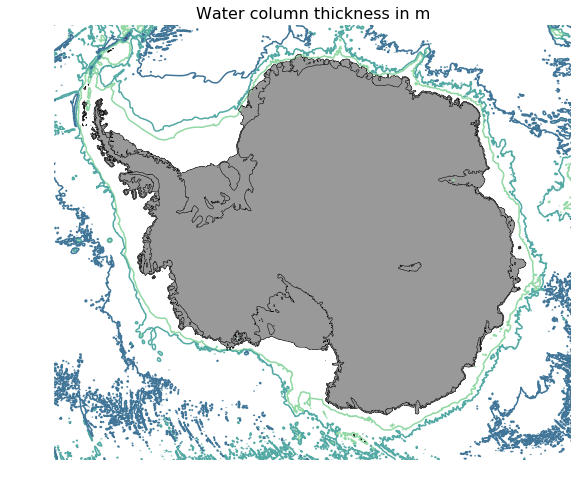

In [4]:
%matplotlib inline
land_zice = (grd.mask_rho==0) | (grd.zice < 0.0)


plt.close()
fig,ax = plt.subplots(figsize=(10,8))
ax.contourf(grd.mask_rho.where(land_zice).values,colors=(('0.6','0.6','0.6')))

(grd.h+grd.zice).where(grd.mask_rho).plot.contour(cmap=ocm.deep,ax=ax)

ax.contour(-grd.zice.where(grd.mask_rho).values, levels=['0.01'], colors=('black'),linewidths=0.5)
ax.contour(grd.mask_rho.values, levels=['0.01'], colors=('black'),linewidths=0.5)
plt.title('Water column thickness in m', fontsize=16)
ax.set_aspect('equal')
ax.axis('off')
plt.savefig(out_path,format='png',dpi=300)
plt.show()

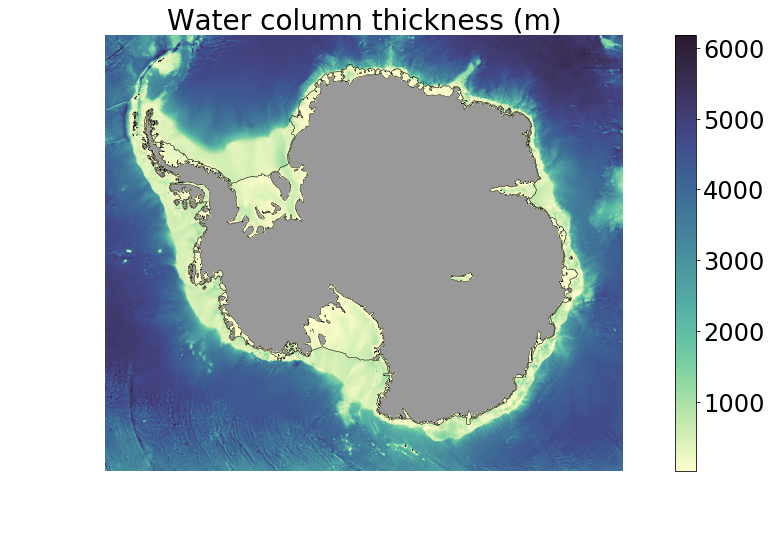

In [23]:
import matplotlib

plt.close()
fig,ax = plt.subplots(figsize=(15,8))
ax.contourf(grd.mask_rho.values,colors=(('0.6','0.6','0.6')))
(grd.h+grd.zice).where(grd.mask_rho).plot(cmap=ocm.deep,cbar_kwargs={'label':''})
ax.contour(-grd.zice.where(grd.mask_rho).values, levels=['0.01'], colors=('black'),linewidths=0.5)
ax.contour(grd.mask_rho.values, levels=['0.01'], colors=('black'),linewidths=0.5)
matplotlib.rcParams.update({'font.size': 24}) 
plt.title('Water column thickness (m)', fontsize=28)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()

if out_path:
    plt.savefig(out_path,format='png',dpi=375)
plt.show()